# Manufacturing costs: Economy of scale
____
Based on: https://www.kaggle.com/vinicius150987/manufacturing-cost

Everything has pretty much been done on the related notebooks on Kaggle. My aim here is to:

* Add some clarifications on why this study is suitable for a ML (Machine Learning) regression model
* Explain some modelling technics along the way

Moreover, this study can also give ideas to small manufacturing companies on the power the predictive analyses can give when building a business strategy.

The dataset is about economy of scale and is simple enough to be understood by just every body (those who are comfortable with python, those who simply want to know how a predictive model is built or business people who simply want to see what can we get out of it for a business strategy).

So without furter ado, let's get into it!

## Dataset Loading:

We will need some libraries or modules to work with:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# tip: after the first ' of the read_csv function hit tab to have the list of available file 
cost_df = pd.read_csv('EconomiesOfScale.csv')
print('data stored in cost_df','\ndata frame shape:', cost_df.shape)

data stored in cost_df 
data frame shape: (1000, 2)


In [5]:
cost_df.head()

,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013


In [6]:
cost_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Number of Units     1000 non-null   float64
 1   Manufacturing Cost  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


This is small dataset with only 1000 lines and 2 columns (type float).

We also see that there are no missing values so there is no rework needed on the data as is. (Note that the first part of any data analysis project is to validate the data quality).

The next step is to try to understand more the data both numerically (with descriptive statistics tools) and graphically.

## Data exploration:

In [7]:
# Statistic description:
cost_df.describe()

,Number of Units,Manufacturing Cost
count,1000.000000,1000.000000
mean,4.472799,40.052999
std,1.336241,10.595322
min,1.000000,20.000000
25%,3.594214,32.912036
50%,4.435958,38.345781
75%,5.324780,44.531822
max,10.000000,100.000000


The data is not in the same range (we can see that when comparing the means). The maximum number of units is 10 (even if I don't know how to interpret a fraction of number of units... May be we are talking about hours... But we have no description on that so let's suppose we can continue as is).

In [15]:
#Analysing dataset with pandas-profiling
from pandas_profiling import ProfileReport # You need to install the module first with conda install -c conda-forge pandas-profiling
report = ProfileReport(cost_df, title='Cost-Analysis', html={'style':{'full_width':False}})

In [16]:
report

The report above pretty much give us everything. We see that:
* There are no missing values
* All values are distinct
* The Number of units has rather a normal distribution (the mean and the median are alike)
* The Manufacturing cost is rigth skewed (Costs are principally below the mean)
* There is a negative correlation between the columns (economy of scale: costs decrease when number of units increase)

All that in one line of code!

## Data visualisation:

In [17]:
# Let's use seaborn for the visualisation
import seaborn as sns

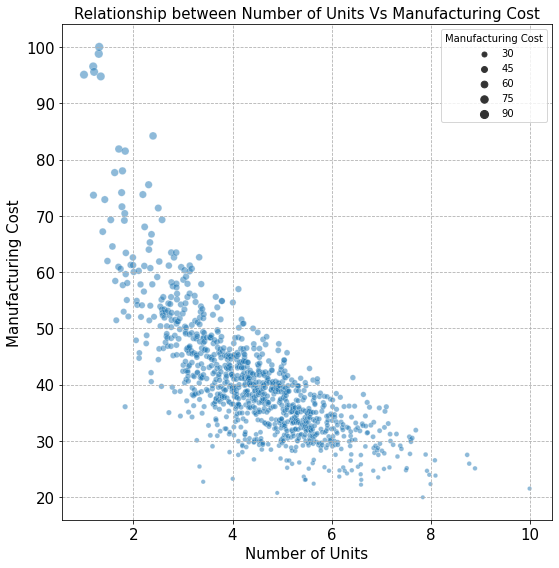

In [31]:
fig = plt.figure(figsize=(8,8))
#ax = fig.add_subplot(1,1,1)
ax = sns.scatterplot(x = 'Number of Units', y = 'Manufacturing Cost', size = 'Manufacturing Cost', alpha=.5, data = cost_df)
ax.set_title('Relationship between Number of Units Vs Manufacturing Cost', fontsize=15)
ax.set_xlabel(cost_df.columns[0], fontsize=15)
ax.set_ylabel(cost_df.columns[1], fontsize=15)
ax.grid(b=True, which='major', linestyle='--')
ax.tick_params(axis='both', labelsize=15, labelcolor='k')
plt.tight_layout()
#plt.show()

We have the following facts:
* there is a rather strong negative correlation between our variables
* the target variable is the cost (a continuous variable)
* the only feature variable is the number of units which is also continuous

We are trying to predict the cost so the best approach is to preform a regression analysis. Why a regression? A regression model will produce a manufacturing cost knowing a predefine number of units. So by only knowing the number of units you would like to produce in the future, you will be able to know in advance the related manufacturing cost and shape the budget accordingly.

Looking at the shape of the points cloud, we can already state that the relation is not really linear. Later we will look at the error between our models and the data to validate this statement.

## Data splitting & pre-processing:

This is the first step of the modelling process. We split our dataset in order to use 80% (in our case) for the model construction and 20% to see if our model can actually predict the unknown (for the model evaluation purpose).

So here is what we are going to do:
1. split our data into two part (80% train-20% test)
2. scale our feature variable (the number of units) to have the same range than the target

In [32]:
cost_df.head()

,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013


In [60]:
#1 Data splitting:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cost_df['Number of Units'].values, 
                                                    cost_df['Manufacturing Cost'].values,
                                                    test_size = 0.2,
                                                    random_state = 4)

In [61]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800,), (200,), (800,), (200,))

In [63]:
#2 Data scaling:
from sklearn.preprocessing import StandardScaler
# Tip: after importing write Standa and hit tab for auto-completion
X_scaled_train = StandardScaler().fit_transform(np.reshape(X_train, (-1, 1)))
X_scaled_test = StandardScaler().fit_transform(np.reshape(X_test, (-1, 1)))

In [68]:
X_scaled_train[0:5], X_scaled_test[0:5]

(array([[ 0.26752082],
        [ 0.00167938],
        [ 0.37084889],
        [-1.18496597],
        [ 0.0550169 ]]),
 array([[0.51869451],
        [0.1800593 ],
        [0.72391021],
        [0.82646463],
        [0.03552374]]))

## Model construction:

### Linear regression model

In [70]:
from sklearn.linear_model import LinearRegression
# Model definition
lr_model = LinearRegression()
# Model fitting
lr_model.fit(X_scaled_train, y_train)
# Model prediction
yhat1 = lr_model.predict(X_scaled_test)
# R2 score evaluation
lr_model.score(X_scaled_test, y_test)

0.54964317033479

The R2 score indicates that our current model only explain about 55% of the data, which is not so great.

Let's visualize the fitting the fitting:

In [74]:
print('Linear Model Coefficient (m): ', lr_model.coef_)
print('Linear Model Coefficient (b): ', lr_model.intercept_)

Linear Model Coefficient (m):  [-8.36507272]
Linear Model Coefficient (b):  40.240337253700005


On a business point of view how can we interpret this:
* If we don't produce any units we have an scaled investment cost of about 40 (whatever the unit is)
* By producing, we decrease the investment by about 8 times the number of scaled units
* But with our model as is, we would be right only about 55% of the time

But let's not forget that we have scaled our values!!

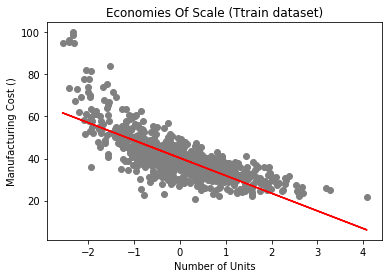

In [89]:
# Scatter plot of the test data target
plt.scatter(X_scaled_train, y_train, color = 'gray')
# plot of the regression line:
plt.plot(X_scaled_train, lr_model.predict(X_scaled_train), color = 'red')
# Plotting options:
plt.ylabel('{} ()'.format(cost_df.columns[1]))
plt.xlabel('{}'.format(cost_df.columns[0]))
plt.title('Economies Of Scale (Ttrain dataset)')
plt.show()

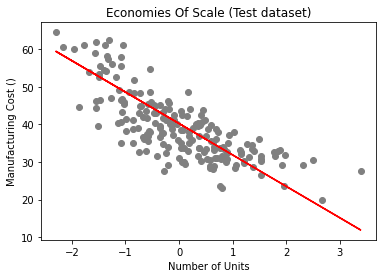

In [88]:
# Scatter plot of the test data target
plt.scatter(X_scaled_test, y_test, color = 'gray')
# plot of the regression line:
plt.plot(X_scaled_test, yhat1, color = 'red')
# Plotting options:
plt.ylabel('{} ()'.format(cost_df.columns[1]))
plt.xlabel('{}'.format(cost_df.columns[0]))
plt.title('Economies Of Scale (Test dataset)')
plt.show()

From the start, we could have seen that linear regression will be challenging by plotting the residual plot (A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis)

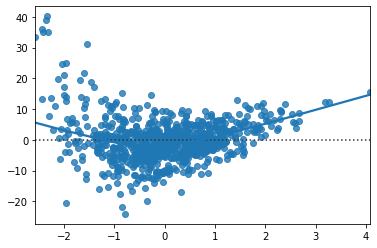

In [82]:
# Plot of the residue
sns.residplot(x = X_scaled_train, y= y_train, lowess=True)
plt.show()

We can see from this residual plot that the residuals are not randomly spread around the x-axis, which leads us to believe that maybe a non-linear model is more appropriate for this data.

So let's try a polynomial regression.

### Polynomial regression

In [84]:
from sklearn.preprocessing import PolynomialFeatures # To increase the order of our feature (number of units)
# second order polynomial feature transformation
X_poly2_train = PolynomialFeatures(degree = 2).fit_transform(X_scaled_train)
X_poly2_test = PolynomialFeatures(degree = 2).fit_transform(X_scaled_test)

# Model definition and training
lr_poly_model = LinearRegression().fit(X_poly2_train, y_train)
# Model prediction
yhat2 = lr_poly_model.predict(X_poly2_test)
# Model R2 evaluation
lr_poly_model.score(X_poly2_test, y_test)

0.6032057829355988

In [94]:
lr_poly_model.coef_

array([ 0.        , -8.72184448,  2.20690928])

Changing the order or our regression increased the R2 score which is good. Our model can now explain about 60% of our test set (i.e of the unknown).

Changing the order simply means that:
* the relation between the number of units and the manufacturing cost is more complex
* in addition to the number of units as is, we have to consider an higher order term of the latter

Let's see or model (in red) below:

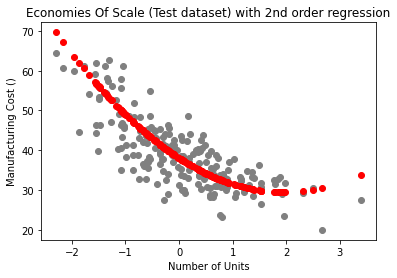

In [87]:
plt.scatter(X_scaled_test, y_test, color = 'gray')
plt.scatter(X_scaled_test,yhat2, color = 'red')
plt.ylabel('{} ()'.format(cost_df.columns[1]))
plt.xlabel('{}'.format(cost_df.columns[0]))
plt.title('Economies Of Scale (Test dataset) with 2nd order regression')
plt.show()

So 60% is great but we can always do better than this. But I think that is now only a matter of technics and algorithms. We could:
* Increase the order (maybe combine with a Ridge analysis)
* Try a non linear function
* Use an high rank algorithm

So, for now, let's just use some other regression algorithms (even if the steps are the same) to give examples.

### Ada Boosting

In [90]:
from sklearn.ensemble import AdaBoostRegressor
# Model definition & training:
ad_model = AdaBoostRegressor().fit(X_scaled_train, y_train)
# Model evaluation
ad_model.score(X_scaled_test, y_test)

0.5518837734839397

### Gradient boosting

In [91]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor().fit(X_scaled_train, y_train)
gb_model.score(X_scaled_test, y_test)

0.5687838692847533

### random Forest

In [92]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=300, random_state=0).fit(X_scaled_train, y_train)
rf_model.score(X_scaled_test, y_test)

0.3803662468237369

**Conclusion:**

With a simple case:

* We used the regression analytic approach to create different model in order to predict the manufacturing cost
* We saw that with a model we could weigh our manufacturing decision on a more logical way
* The model can be seen as an explicit relation that we can use to address a new business strategy

___

**By: SSIME**